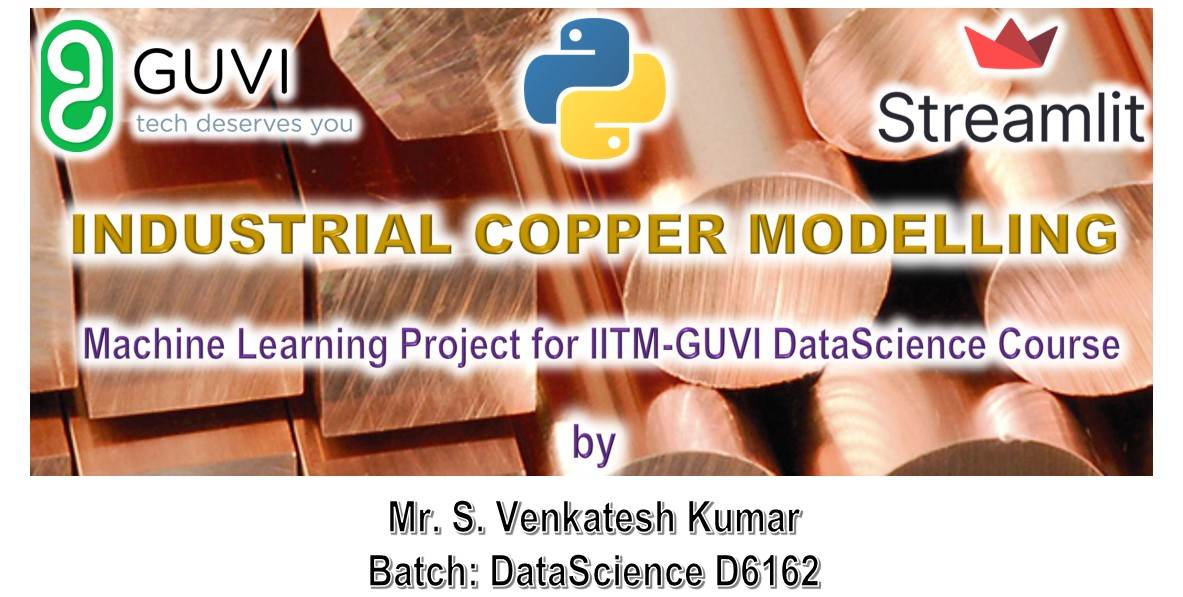

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file
cu=pd.read_csv('Copper_Set.csv')

In [3]:
# viewing the data structure
cu.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


## 2. Exploratory Data Analysis

In [4]:
# Viewing the shape and size of the data
print('\033[1mShape:',cu.shape[0],'Rows &',cu.shape[1],'Columns')
print('Size:',cu.size,'datapoints')

Shape: 181673 Rows & 14 Columns
Size: 2543422 datapoints


In [5]:
# Viewing what are the coulmns present in the data
cu.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [6]:
# Viewing basic information about the data like total no of rows,column names with their respective datatype and non-null count
cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


### **From the above .info(), it is clear that datatype conversion is essential.** 

### Datatype conversion

In [7]:
# Create a copy of the data
copper=cu.copy()
copper.tail(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.6865384,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [8]:
# Viewing count of unique values in each column
cu.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [9]:
# Description about Numerical columns
cu.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [10]:
# Description about Categorical columns

cu.describe(exclude=[np.number])

,id,quantity tons,status,item type,material_ref
count,181671,181673.000000,181671,181673,103754
unique,181671,181673.000000,9,7,16563
top,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,54.151139,Won,W,DX51D+Z
freq,1,1.000000,116010,105615,922


In [11]:
# droping irrelevant columns
copper=copper.drop(columns=['id','material_ref'],axis=1)
copper

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181669,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181670,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181671,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [12]:
# Check for null values
copper.isnull().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [13]:
copper.dropna(inplace=True)

In [14]:
copper.reset_index(drop=True)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181633,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181634,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181635,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181636,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [15]:
copper.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
# Check for duplicated values
copper.duplicated().sum()

0

In [17]:
copper.loc[53]

item_date        20210401.0
quantity tons      30.89995
customer         30336279.0
country                78.0
status                  Won
item type                 S
application            59.0
thickness               3.0
width                 800.0
product_ref          640665
delivery date    20210501.0
selling_price         846.0
Name: 53, dtype: object

In [18]:
copper.drop(52,inplace=True)

In [19]:
copper.reset_index(drop=True)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181632,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00
181633,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00
181634,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00
181635,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00


In [20]:
copper['item_date']=pd.to_datetime(copper['item_date'],format='%Y%m%d',errors='coerce')

In [21]:
copper['item_date']=pd.to_datetime(copper['item_date'])

In [22]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181637 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181636 non-null  datetime64[ns]
 1   quantity tons  181637 non-null  object        
 2   customer       181637 non-null  float64       
 3   country        181637 non-null  float64       
 4   status         181637 non-null  object        
 5   item type      181637 non-null  object        
 6   application    181637 non-null  float64       
 7   thickness      181637 non-null  float64       
 8   width          181637 non-null  float64       
 9   product_ref    181637 non-null  int64         
 10  delivery date  181637 non-null  float64       
 11  selling_price  181637 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 18.0+ MB


In [23]:
# Datatype conversion
#copper['item_date'] = pd.to_datetime(copper['item_date'], format='%Y-%m-%d', errors='coerce').dt.date
copper['quantity tons'] = pd.to_numeric(copper['quantity tons'], errors='coerce')
copper['customer'] = pd.to_numeric(copper['customer'], errors='coerce')
copper['country'] = pd.to_numeric(copper['country'], errors='coerce')
copper['application'] = pd.to_numeric(copper['application'], errors='coerce')
copper['thickness'] = pd.to_numeric(copper['thickness'], errors='coerce')
copper['width'] = pd.to_numeric(copper['width'], errors='coerce')
copper['product_ref'] = pd.to_numeric(copper['product_ref'], errors='coerce')
#copper['delivery date'] = pd.to_datetime(copper['delivery date'], format='%Y-%m-%d', errors='coerce').dt.date
copper['selling_price'] = pd.to_numeric(copper['selling_price'], errors='coerce')

In [24]:
#copper['item_date'] = pd.to_datetime(copper['item_date'], format='%Y-%m-%d')
copper['delivery date'] = pd.to_datetime(copper['delivery date'], format='%Y%m%d',errors='coerce')


In [25]:
copper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181637 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181636 non-null  datetime64[ns]
 1   quantity tons  181636 non-null  float64       
 2   customer       181637 non-null  float64       
 3   country        181637 non-null  float64       
 4   status         181637 non-null  object        
 5   item type      181637 non-null  object        
 6   application    181637 non-null  float64       
 7   thickness      181637 non-null  float64       
 8   width          181637 non-null  float64       
 9   product_ref    181637 non-null  int64         
 10  delivery date  181635 non-null  datetime64[ns]
 11  selling_price  181637 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 18.0+ MB


## Dealing with Null Values

In [26]:
copper=copper.dropna(subset=['item_date','delivery date','quantity tons'])

In [27]:
copper['delivery date'].isnull().sum()

0

In [28]:
copper['item_date'].isnull().sum()

0

In [29]:
copper.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [30]:
copper

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [31]:
copper.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816330e+05,1.816330e+05,181633.000000,181633.000000,181633.000000,181633.000000,1.816330e+05,1.816330e+05
mean,5.876167e+03,3.023251e+07,44.893010,25.616072,2.564190,1295.263685,4.740346e+08,1.918355e+03
std,2.349333e+06,1.005621e+05,24.404237,17.753933,6.572602,261.644745,7.175403e+08,3.318313e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.096819e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036258e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716145e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [32]:
copper['delivery date'].unique()

array(['2021-07-01T00:00:00.000000000', '2021-04-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
       '2021-08-01T00:00:00.000000000', '2021-09-01T00:00:00.000000000',
       '2021-10-01T00:00:00.000000000', '2021-11-01T00:00:00.000000000',
       '2022-01-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-12-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [33]:
copper=copper[copper['quantity tons']>0]

In [34]:
copper=copper[copper['selling_price']>0]

In [35]:
copper['quantity tons']=copper['quantity tons'].round(2)

In [36]:
copper.reset_index(drop=True)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181617,2020-07-02,106.78,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00
181618,2020-07-02,102.48,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181619,2020-07-02,208.09,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181620,2020-07-02,4.24,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00


# Data Visualisation
## Univariate analysis

In [37]:
print('Total no. of countries in the data:',copper['country'].nunique())
copper['country'].value_counts()

Total no. of countries in the data: 17


78.0     32082
26.0     27513
25.0     23357
27.0     21506
32.0     18657
28.0     15822
84.0     12776
77.0      9713
30.0      8701
39.0      3730
79.0      2742
38.0      1712
40.0      1683
80.0       817
113.0      714
89.0        92
107.0        5
Name: country, dtype: int64

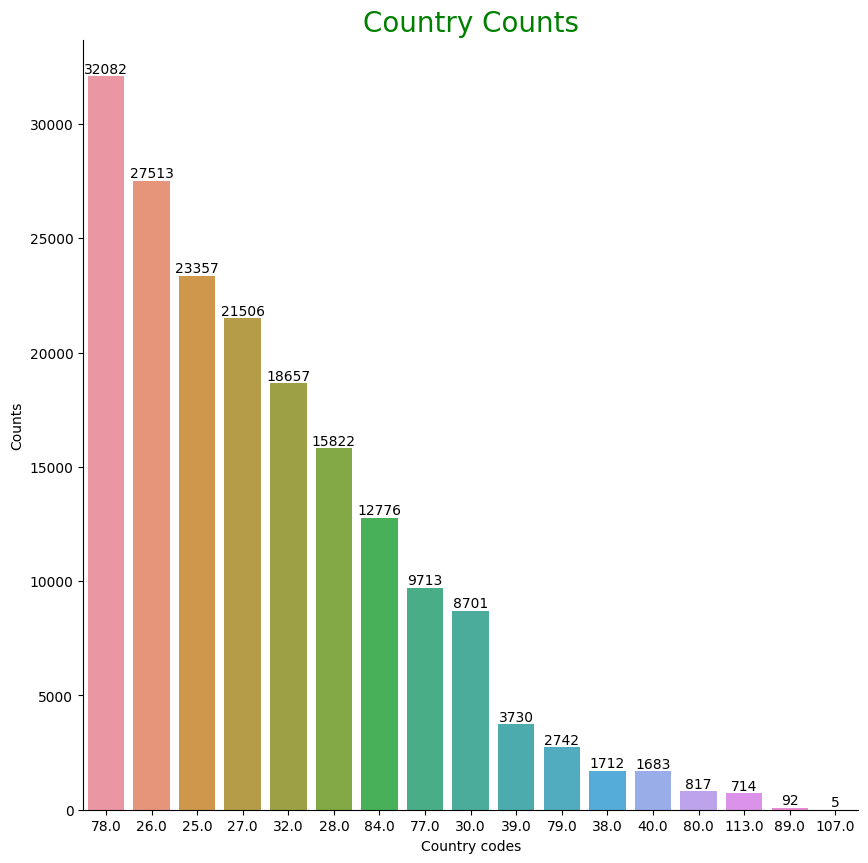

In [38]:
plt.figure(figsize=(10,10))
country=sns.countplot(x='country',data=copper,order=copper['country'].value_counts(ascending=False).index)
country.bar_label(country.containers[0],fontsize=10)

plt.title('Country Counts',fontsize=20,color='green')
plt.xlabel('Country codes',fontsize=10)
plt.ylabel('Counts',fontsize=10)
sns.despine()

In [39]:
copper['product_ref'].nunique()

33

In [40]:
copper['product_ref'].value_counts()

611993        45719
164141591     28778
640665        27373
1670798778    18913
628377        18572
1668701718    15282
640405         9692
1671863738     5161
1332077137     4559
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      256
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: product_ref, dtype: int64

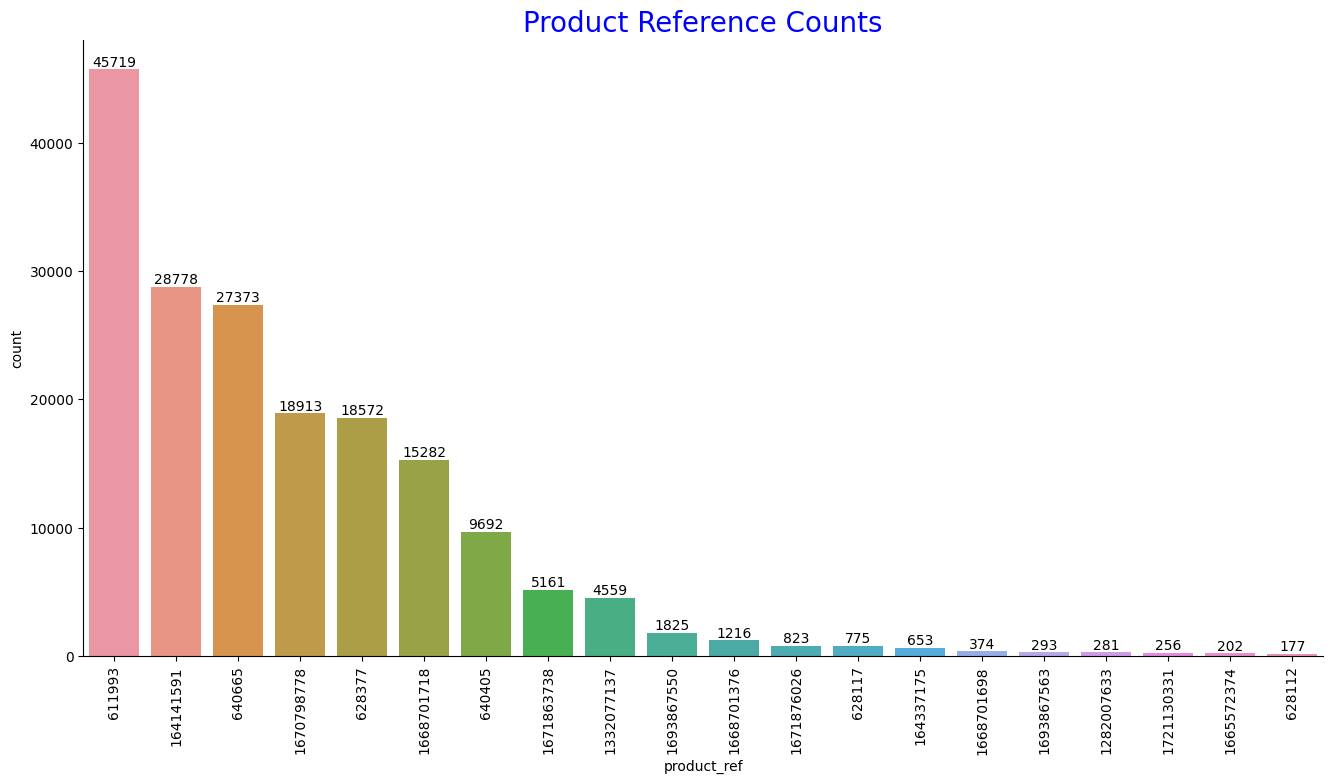

In [41]:
plt.figure(figsize=(16,8))
prodref=sns.countplot(x='product_ref',data=copper,order=copper['product_ref'].value_counts(ascending=False).index[:20])
prodref.bar_label(prodref.containers[0],size=10)
plt.xticks(rotation=90)
plt.title('Product Reference Counts',fontsize=20,color='blue')
sns.despine()

In [42]:
copper.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0


In [43]:
copper['item_date'].dt.year.value_counts()

2020    110736
2021     70886
Name: item_date, dtype: int64

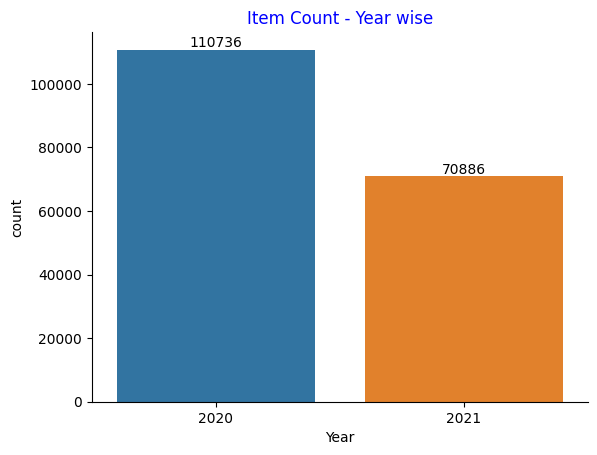

In [44]:
year_item_date=sns.countplot(x=copper['item_date'].dt.year)
year_item_date.bar_label(year_item_date.containers[0])
plt.title('Item Count - Year wise',color='blue')
plt.xlabel('Year')
sns.despine()

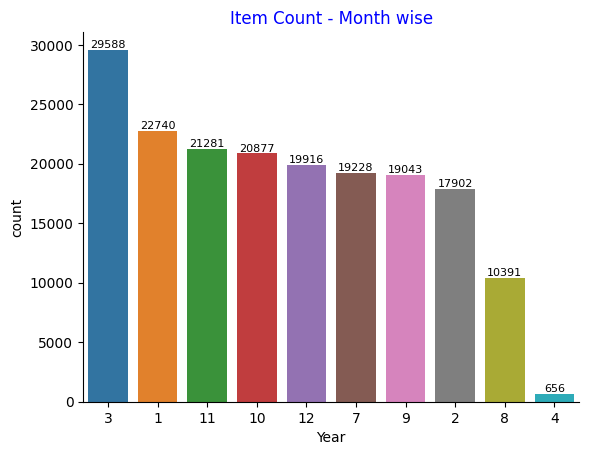

In [45]:
year_item_date=sns.countplot(x=copper['item_date'].dt.month,order=copper['item_date'].dt.month.value_counts(ascending=False).index)
year_item_date.bar_label(year_item_date.containers[0],fontsize=8)
plt.title('Item Count - Month wise',color='blue')
plt.xlabel('Year')
sns.despine()

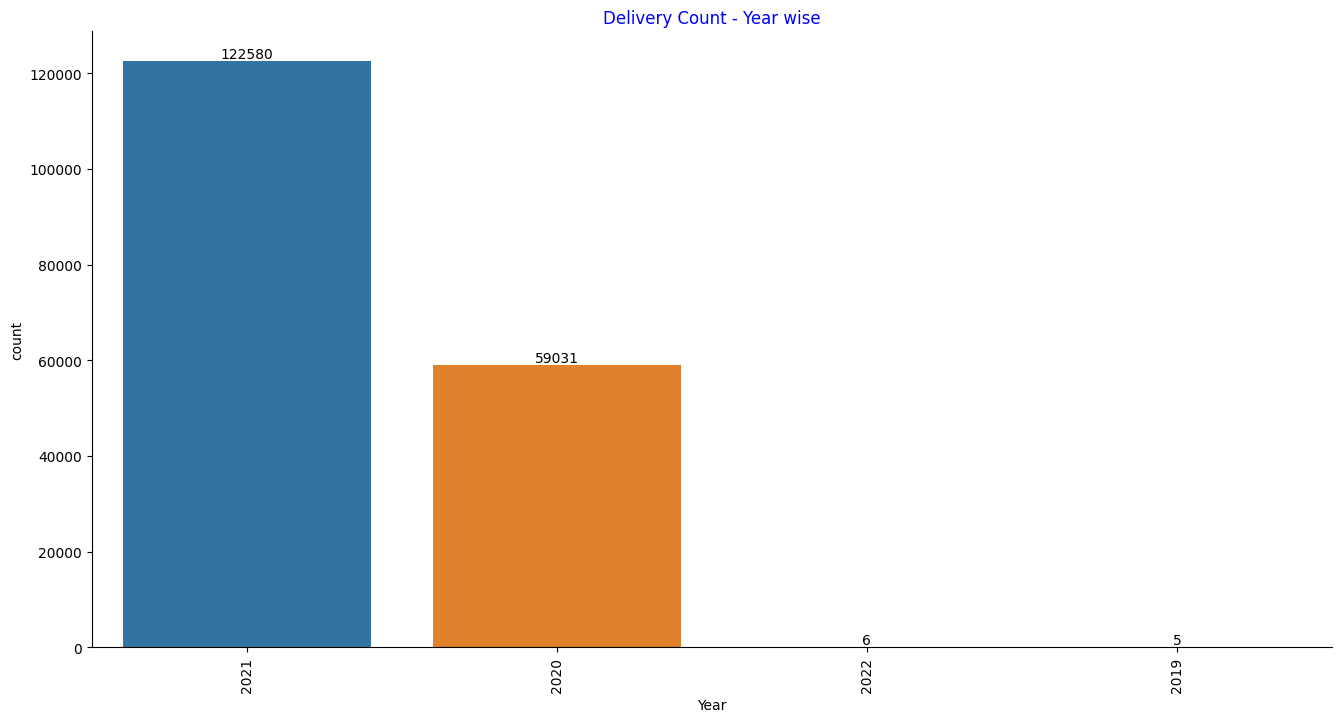

In [46]:
plt.figure(figsize=(16,8))
year_deli_date=sns.countplot(x=copper['delivery date'].dt.year,order=(copper['delivery date'].dt.year).value_counts(ascending=False).index)
year_deli_date.bar_label(year_deli_date.containers[0])
plt.title('Delivery Count - Year wise',color='blue')
plt.xlabel('Year')
plt.xticks(rotation=90)
sns.despine()

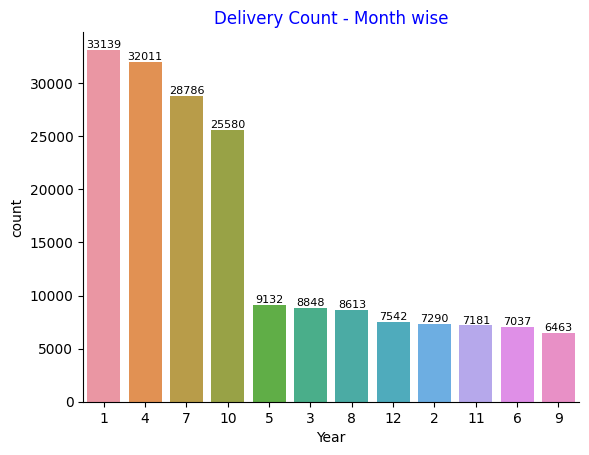

In [47]:
year_deli_date=sns.countplot(x=copper['delivery date'].dt.month,order=copper['delivery date'].dt.month.value_counts(ascending=False).index)
year_deli_date.bar_label(year_deli_date.containers[0],fontsize=8)
plt.title('Delivery Count - Month wise',color='blue')
plt.xlabel('Year')
sns.despine()

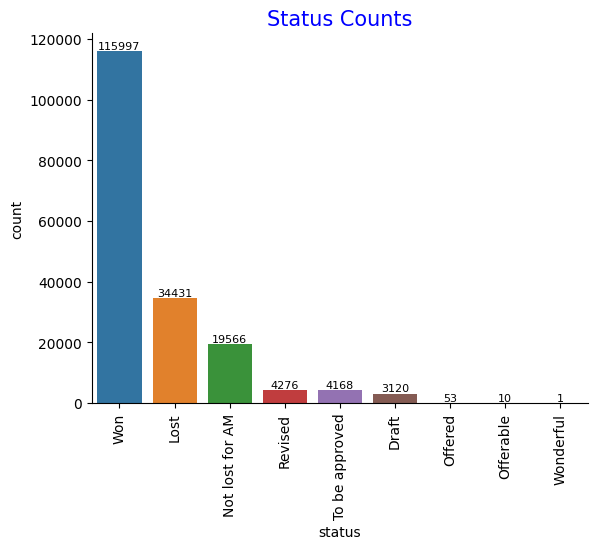

In [48]:
status=sns.countplot(x=copper['status'],order=copper['status'].value_counts(ascending=False).index)
status.bar_label(status.containers[0],fontsize=8)
plt.xticks(rotation=90)
plt.title('Status Counts',fontsize=15,color='blue')
sns.despine()

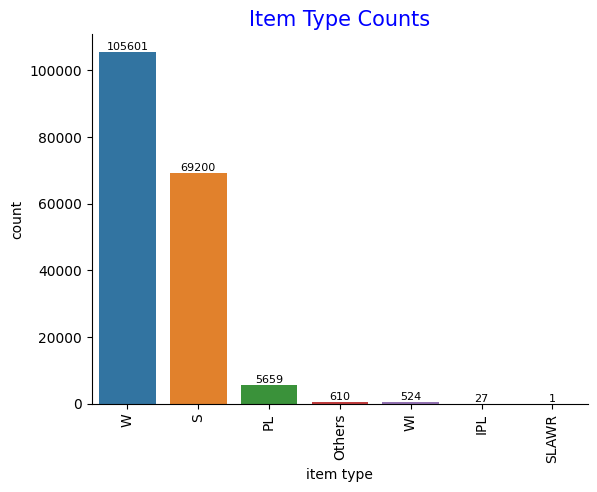

In [49]:
item_type=sns.countplot(x=copper['item type'],order=copper['item type'].value_counts(ascending=False).index)
item_type.bar_label(item_type.containers[0],fontsize=8)
plt.xticks(rotation=90)
plt.title('Item Type Counts',fontsize=15,color='blue')
sns.despine()

In [50]:
copper.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [51]:
copper.nunique()

item_date          250
quantity tons    28556
customer          1167
country             17
status               9
item type            7
application         30
thickness          593
width             1386
product_ref         33
delivery date       26
selling_price     9789
dtype: int64

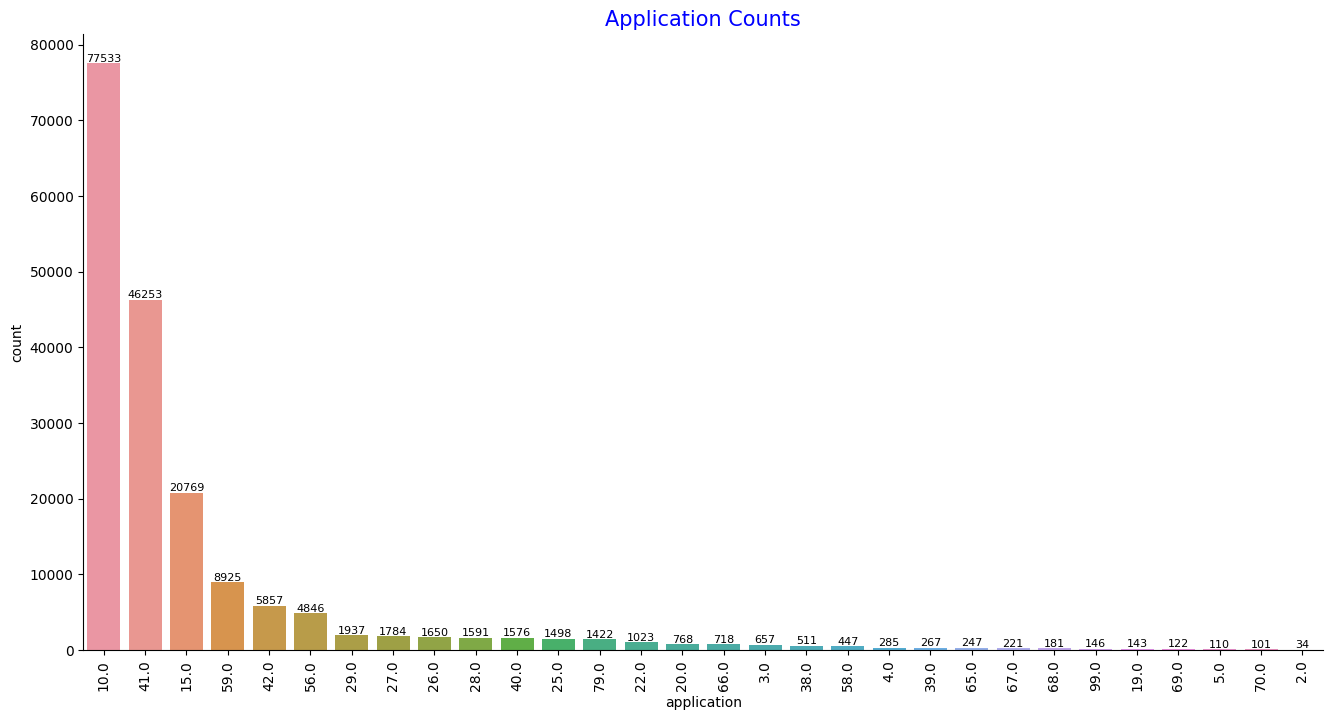

In [52]:
plt.figure(figsize=(16,8))
app=sns.countplot(x=copper['application'],order=copper['application'].value_counts(ascending=False).index)
app.bar_label(app.containers[0],fontsize=8)
plt.xticks(rotation=90)
plt.title('Application Counts',fontsize=15,color='blue')
sns.despine()

In [53]:
copper['volume']=copper['thickness']*copper['width']

In [54]:
copper['volume'].nunique()

10371

In [55]:
copper.rename(columns={'volume':'CrSArea'},inplace=True)

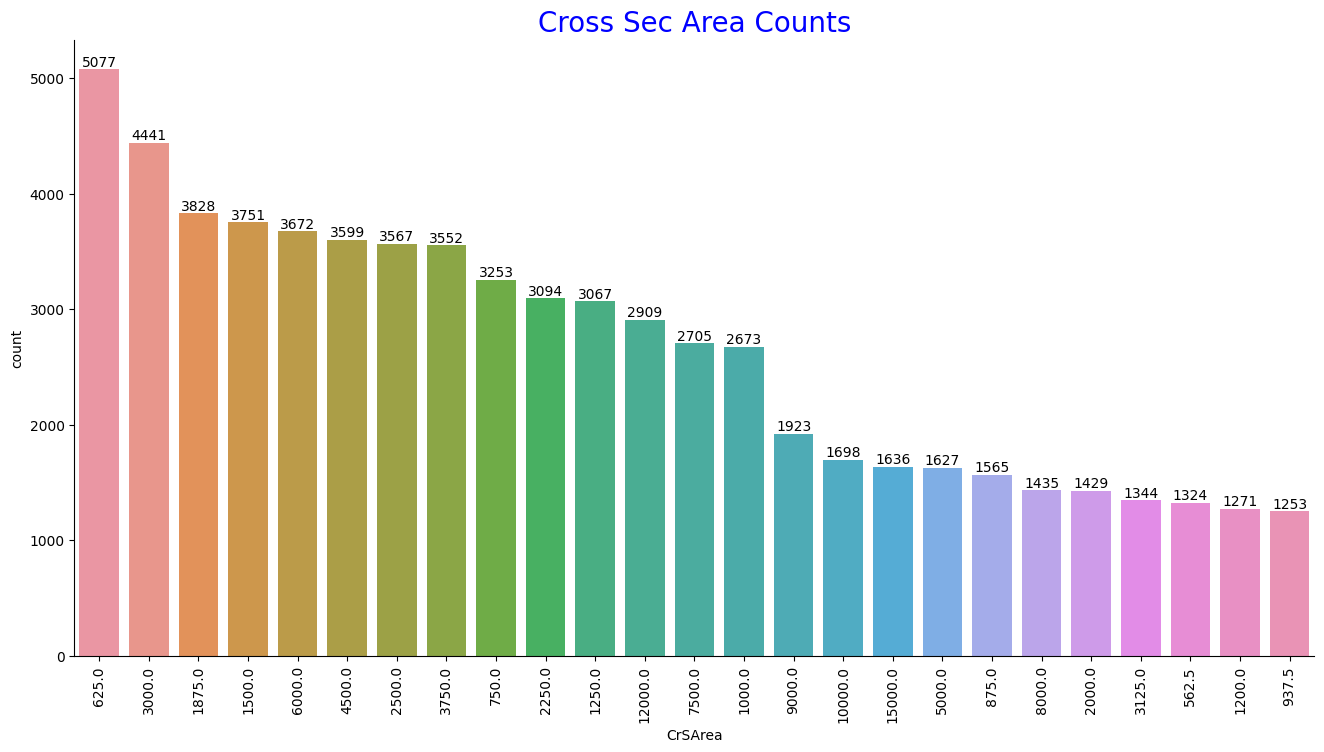

In [56]:
plt.figure(figsize=(16,8))
vol=sns.countplot(x=copper['CrSArea'],order=copper['CrSArea'].value_counts(ascending=False).index[:25])
vol.bar_label(vol.containers[0],fontsize=10)
plt.title('Cross Sec Area Counts',fontsize=20,color='blue')
plt.xticks(rotation=90)
sns.despine()

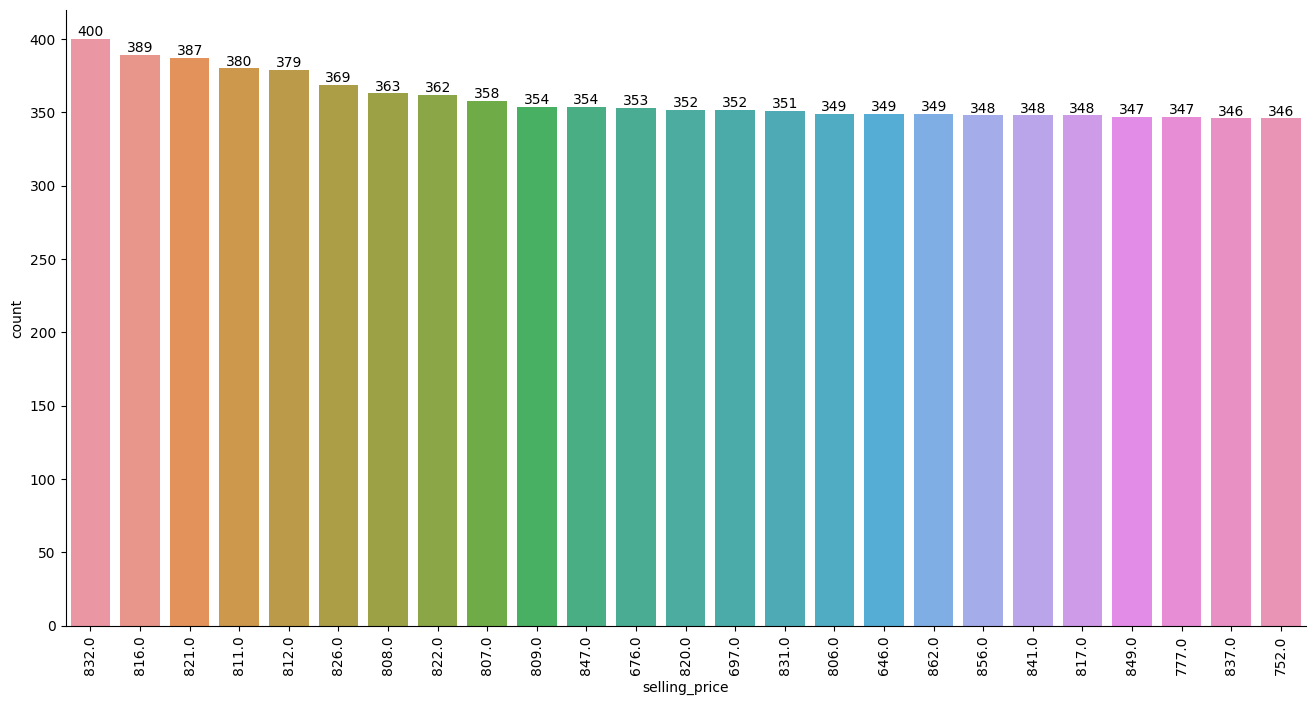

In [57]:
plt.figure(figsize=(16,8))
sp=sns.countplot(x=copper['selling_price'],order=copper['selling_price'].value_counts(ascending=False).index[:25])
sp.bar_label(sp.containers[0],fontsize=10)
plt.xticks(rotation=90)
sns.despine()

In [58]:
copper.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,3000.0
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0,968.0


In [59]:
cust_group=copper.groupby(['customer'])['selling_price'].mean().sort_values(ascending =False).to_frame()

In [60]:
#cust_group.rename(columns={'selling_price':'SP'},inplace=True)

In [61]:
cust_group=cust_group.reset_index()

In [62]:
cust_group.describe()

,customer,selling_price
count,1.167000e+03,1.167000e+03
mean,3.024402e+07,1.809170e+04
std,8.890966e+05,5.854613e+05
min,1.245800e+04,1.200000e+01
25%,3.020309e+07,7.282295e+02
50%,3.027138e+07,8.258125e+02
75%,3.034147e+07,9.513048e+02
max,3.040818e+07,2.000071e+07


In [63]:
cust_group['customer']

0       30353306.0
1       30217607.0
2       30147848.0
3       30272666.0
4       30357385.0
           ...    
1162    30276619.0
1163    30398602.0
1164    30348439.0
1165    30218794.0
1166    30350537.0
Name: customer, Length: 1167, dtype: float64

<Axes: xlabel='customer', ylabel='selling_price'>

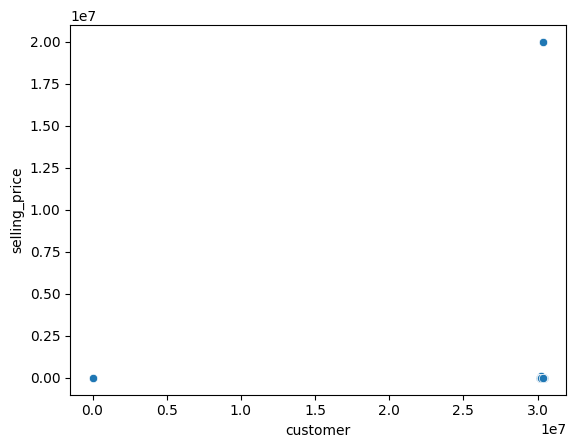

In [64]:
sns.scatterplot(x='customer',y='selling_price',data=cust_group)

In [65]:
copper.groupby(copper['item_date'].dt.year)['selling_price'].sum()

item_date
2020    8.097360e+07
2021    2.674638e+08
Name: selling_price, dtype: float64

In [66]:
copper.groupby(copper['delivery date'])['selling_price'].sum()

delivery date
2019-04-01    1.286380e+03
2019-07-01    2.489810e+03
2019-10-01    9.758100e+02
2020-01-01    8.303647e+04
2020-04-01    4.267502e+04
2020-05-01    8.522000e+03
2020-06-01    1.984000e+04
2020-07-01    5.504583e+06
2020-08-01    2.650572e+06
2020-09-01    3.610141e+06
2020-10-01    1.865056e+07
2020-11-01    4.775331e+06
2020-12-01    5.518043e+06
2021-01-01    1.255131e+08
2021-02-01    5.301030e+06
2021-03-01    7.110566e+06
2021-04-01    2.980980e+07
2021-05-01    1.081726e+08
2021-06-01    6.390519e+06
2021-07-01    2.086574e+07
2021-08-01    3.790153e+06
2021-09-01    3.556643e+05
2021-10-01    2.305640e+05
2021-11-01    2.557000e+03
2021-12-01    2.094200e+04
2022-01-01    6.040000e+03
Name: selling_price, dtype: float64

In [67]:
copper.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'CrSArea'],
      dtype='object')

<Axes: xlabel='quantity tons', ylabel='selling_price'>

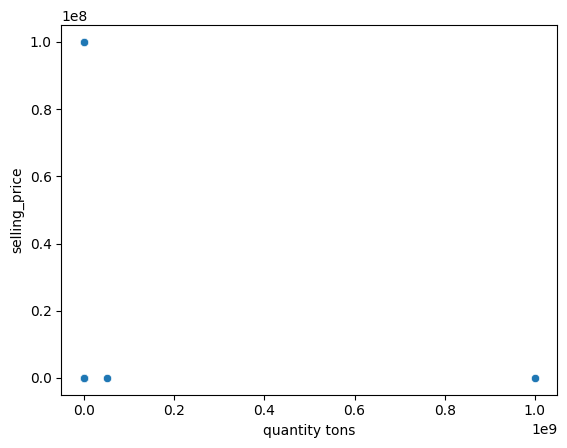

In [68]:
sns.scatterplot(x='quantity tons',y='selling_price',data=copper)

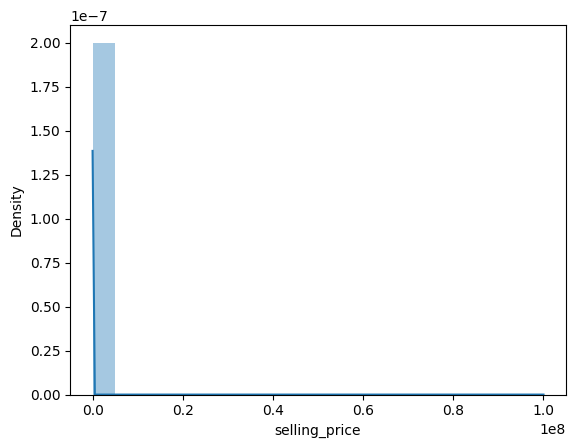

In [69]:
sns.distplot(copper['selling_price'],bins=20,hist=True,kde=True)
plt.show()

In [70]:
cop1=copper.copy()

In [71]:
cop1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3000.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,968.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,361.76
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,3029.10
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,8000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,106.78,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00,1190.40
181668,2020-07-02,102.48,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,1171.20
181669,2020-07-02,208.09,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,1425.00
181670,2020-07-02,4.24,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,887.50


In [72]:
cop1['selling_price'].skew()

301.3457813386571

In [73]:
spsq=np.sqrt(cop1['selling_price'])
spsq.skew()

292.34275851376947

In [74]:
splog=np.log(cop1['selling_price'])
splog.skew()

-5.342786681271056

In [75]:
from scipy import stats

z = np.abs(stats.zscore(cop1['selling_price']))
cop1 = cop1[(z < 3)]
cop1['selling_price'].skew()

108.58134005338157

In [76]:
cop1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,54.15,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3000.00
1,2021-04-01,768.02,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,968.00
2,2021-04-01,386.13,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,361.76
3,2021-04-01,202.41,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,3029.10
4,2021-04-01,785.53,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,8000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,106.78,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00,1190.40
181668,2020-07-02,102.48,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,1171.20
181669,2020-07-02,208.09,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,1425.00
181670,2020-07-02,4.24,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,887.50


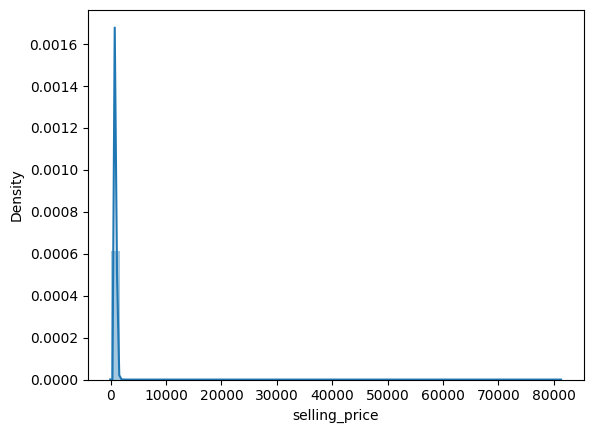

In [77]:
sns.distplot(cop1['selling_price'],bins=None,hist=True,kde=True)
plt.show()

In [78]:
cop1['selling_price'].skew()

108.58134005338157

In [79]:
tonssqrt=np.sqrt(cop1['quantity tons'])
tonssqrt.skew()

395.966008590352

In [80]:
cop1['quantity tons'].skew()

424.628863780073

In [81]:
x = np.abs(stats.zscore(cop1['quantity tons']))
cop1 = cop1[(x < 3)]

In [82]:
cop1['quantity tons'].skew()

49.794259373700406

In [83]:
qtylog=np.log(cop1['quantity tons'])
qtylog.skew()

nan

In [84]:
qtysq=np.sqrt(cop1['quantity tons'])
qtysq.skew()

5.32184948820137

In [85]:
qtycb=np.cbrt(cop1['quantity tons'])
qtycb.skew()

2.567520832759954

In [86]:
qty4th=np.power(cop1['quantity tons'],1/4)
qty4th.skew()

1.7242412737808297

In [87]:
qty5th=np.power(cop1['quantity tons'],1/5)
qty5th.skew()

1.306531570207182

In [88]:
qty8th=np.power(cop1['quantity tons'],1/8)
qty8th.skew()

0.7536709522448005

In [89]:
qty8th

0         1.647024
1         2.294413
2         2.105434
3         1.942133
4         2.300887
            ...   
181667    1.792921
181668    1.783733
181669    1.948863
181670    1.197900
181672    2.119132
Name: quantity tons, Length: 181618, dtype: float64

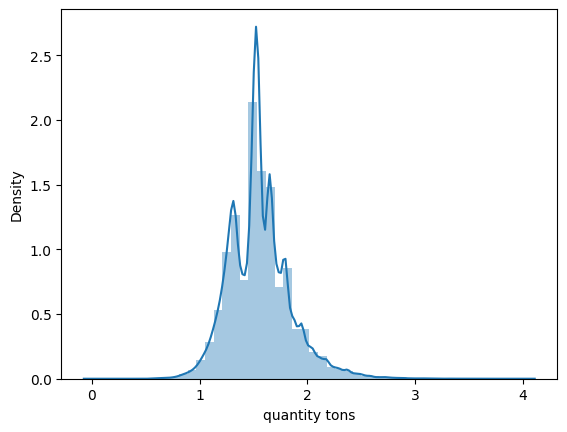

In [90]:
sns.distplot(qty8th,bins=None,hist=True,kde=True)
plt.show()

In [91]:
cop1['quantity tons']=np.sqrt(cop1['quantity tons'])
cop1['quantity tons'].skew()

5.32184948820137

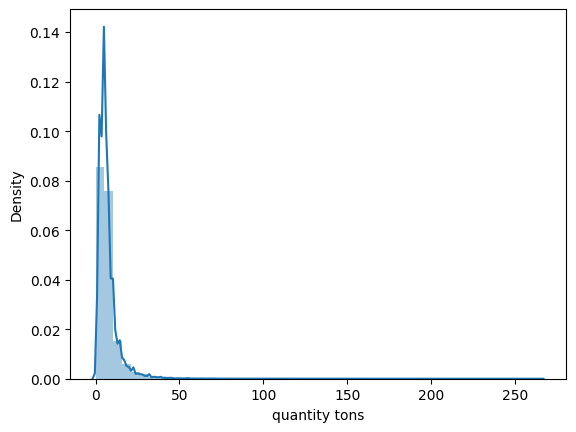

In [92]:
sns.distplot(cop1['quantity tons'],bins=None,hist=True,kde=True)
plt.show()

<Axes: xlabel='selling_price', ylabel='quantity tons'>

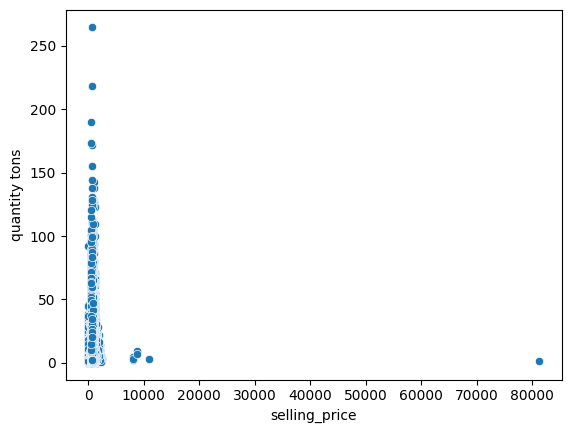

In [93]:
sns.scatterplot(y='quantity tons',x='selling_price',data=cop1)

<Axes: >

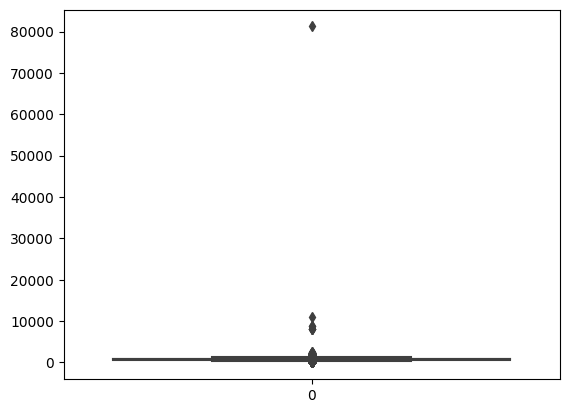

In [94]:
sns.boxplot(cop1['selling_price'])

<Axes: >

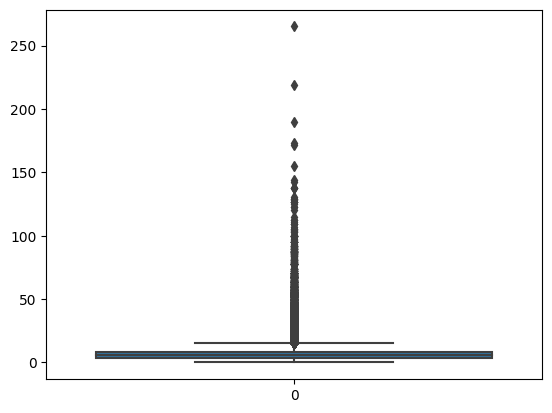

In [95]:
sns.boxplot(cop1['quantity tons'])

<Axes: >

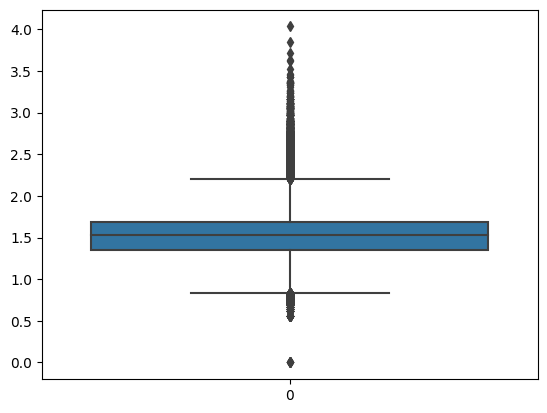

In [96]:
sns.boxplot(qty8th)

In [97]:
cop1.reset_index()

,index,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,0,2021-04-01,7.358668,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,3000.00
1,1,2021-04-01,27.713174,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,968.00
2,2,2021-04-01,19.650191,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,361.76
3,3,2021-04-01,14.227087,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,3029.10
4,4,2021-04-01,28.027308,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,8000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181613,181667,2020-07-02,10.333441,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,2020-07-01,602.00,1190.40
181614,181668,2020-07-02,10.123241,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,1171.20
181615,181669,2020-07-02,14.425325,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,1425.00
181616,181670,2020-07-02,2.059126,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,887.50


<Axes: xlabel='selling_price', ylabel='CrSArea'>

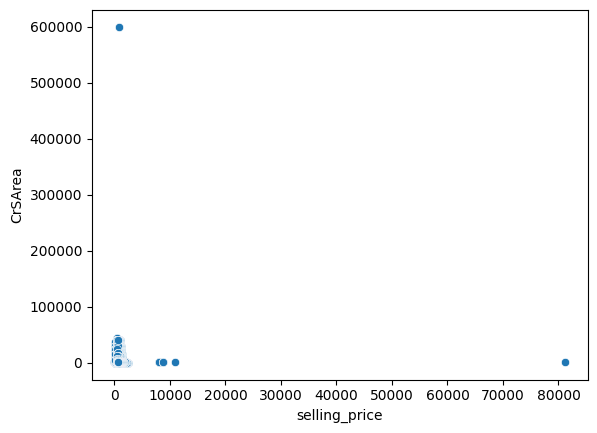

In [98]:
sns.scatterplot(x='selling_price',y='CrSArea',data=cop1)

<Axes: >

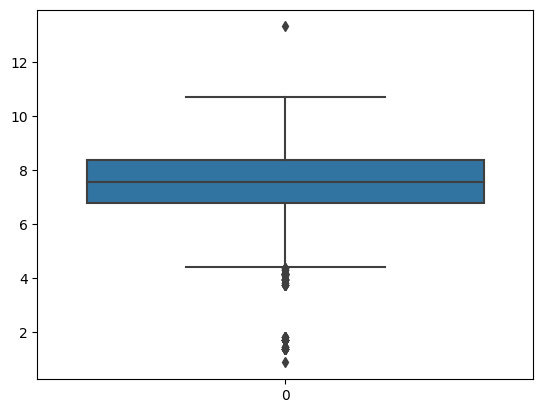

In [99]:
sns.boxplot(np.log(cop1['CrSArea']))

In [100]:
cop1['CrSArea'].skew()

13.256138259756577

In [101]:
cop1['CrSArea']=np.log(cop1['CrSArea'])
cop1['CrSArea'].skew()

0.34075830184189637

In [102]:
crsasqrt=np.sqrt(cop1['CrSArea'])
crsasqrt.skew()

0.12594561059470086

In [103]:
np.log(cop1.thickness).skew()

0.34909850180634805

In [104]:
np.sqrt(cop1['thickness']).skew()

1.379768928753515

In [105]:
cop1['thickness'].skew()

15.302955834115124

In [106]:
cop1['thickness']=np.log(cop1['thickness'])

In [107]:
cop1['thickness'].skew()

0.34909850180634805

In [108]:
cop1.width.skew()

0.3748221845833184

<Axes: >

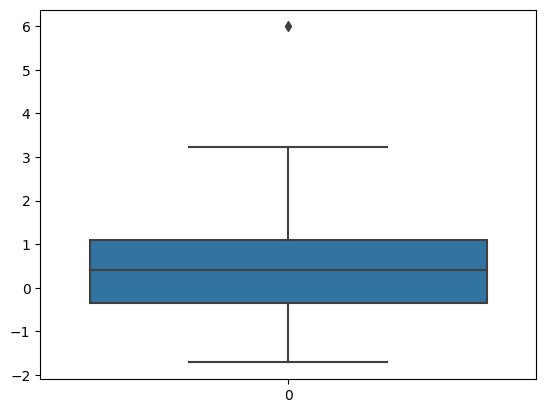

In [109]:
sns.boxplot((cop1['thickness']))


<Axes: >

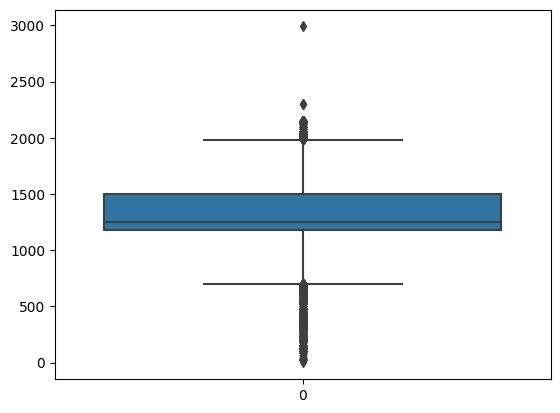

In [110]:
sns.boxplot(cop1['width'])

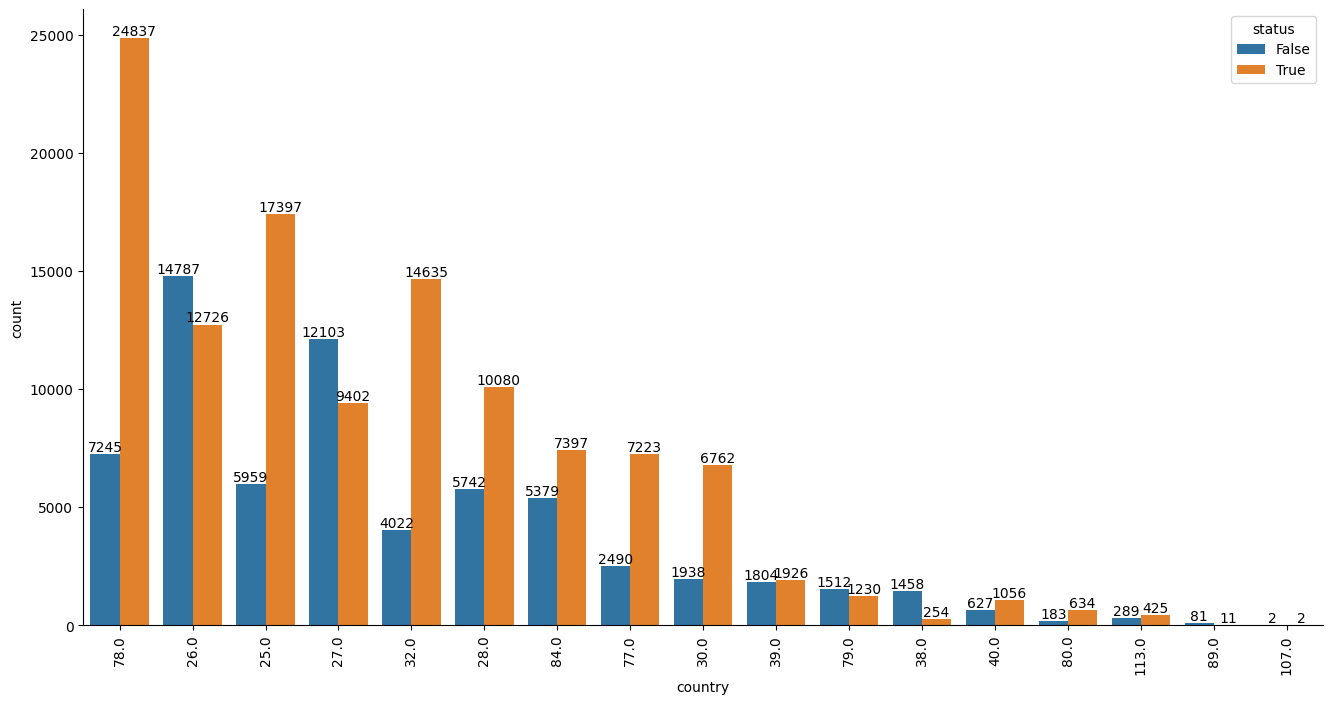

In [111]:
#sns.boxplot(x='rate',y='location',data=df,order=df['location'].value_counts(ascending=False).index[:10])
#sns.boxplot(x='online_order',y='rate',data=df)
plt.figure(figsize=(16,8))
ContStat=sns.countplot(x=cop1['country'],hue=(cop1['status']=='Won'),order=cop1['country'].value_counts(ascending=False).index)
#ContStat.bar_label(ContStat.containers[0])
for cont in ContStat.containers:
    ContStat.bar_label(cont)
plt.xticks(rotation=90)
sns.despine()

In [112]:
cop1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,7.358668,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,1670798778,2021-07-01,854.0,8.006368


In [113]:
cop1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'CrSArea'],
      dtype='object')

In [114]:
heatmap=cop1[['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref',
                  'selling_price','CrSArea']].corr()
target=heatmap['selling_price']
target


quantity tons   -0.034721
customer        -0.000853
country         -0.014732
application      0.090715
thickness       -0.303743
width           -0.122717
product_ref     -0.055427
selling_price    1.000000
CrSArea         -0.300591
Name: selling_price, dtype: float64

<Axes: >

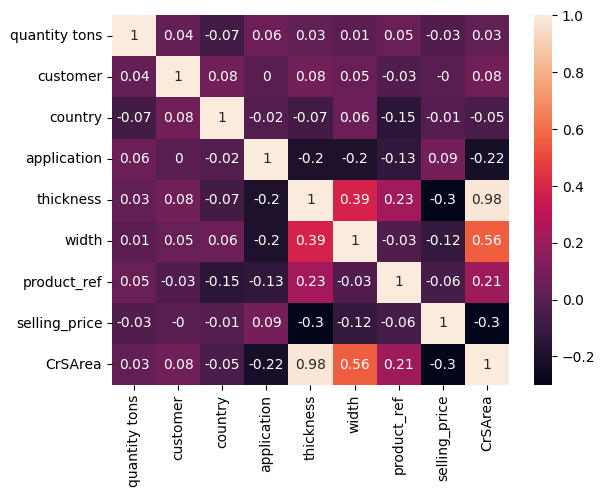

In [115]:
sns.heatmap(heatmap.round(2), annot=True)

# Modeling - Decision Tree Regressor
## Step 1 - Feature Selection

In [116]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV

In [117]:
# Feature and target selection
cop1.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,7.358668,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,1670798778,2021-07-01,854.0,8.006368
1,2021-04-01,27.713174,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,1668701718,2021-04-01,1047.0,6.875232


In [118]:
cop1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'CrSArea'],
      dtype='object')

In [119]:
copper2=cop1[['quantity tons','country', 'status',
       'item type', 'application', 'thickness', 'width']]

In [120]:
copper2.head(2)

,quantity tons,country,status,item type,application,thickness,width
0,7.358668,28.0,Won,W,10.0,0.693147,1500.0
1,27.713174,25.0,Won,W,41.0,-0.223144,1210.0


## Step 2 - Treating Skewness

In [121]:
print('------------------ SKEW VALUES-----------------')
print('Quantity:',copper2['quantity tons'].skew())
print('thickness:',copper2['thickness'].skew())
print('width:',copper2['width'].skew())
print('Selling Price:',cop1['selling_price'].skew())

------------------ SKEW VALUES-----------------
Quantity: 5.32184948820137
thickness: 0.34909850180634805
width: 0.3748221845833184
Selling Price: 108.58133601218383


In [122]:
# Skew value of Quantity is 5.3. S, it should be reduced
q1=np.log(copper2['quantity tons']).skew()
q1

nan

In [123]:
q2=np.sqrt(copper2['quantity tons']).skew()
q2

1.7242412737808297

In [124]:
q3=np.cbrt(copper2['quantity tons']).skew()
q3

1.0526163424135413

In [125]:
q4=np.power(copper2['quantity tons'],1/4).skew()
q4

0.7536709522448005

In [126]:
copper2['quantity tons']=np.power(copper2['quantity tons'],1/4)

In [127]:
print('------------------ NEW SKEW VALUES-----------------')
print('Quantity:',copper2['quantity tons'].skew())
print('thickness:',copper2['thickness'].skew())
print('width:',copper2['width'].skew())
print('Selling Price:',cop1['selling_price'].skew())

------------------ NEW SKEW VALUES-----------------
Quantity: 0.7536709522448005
thickness: 0.34909850180634805
width: 0.3748221845833184
Selling Price: 108.58133601218383


## Step 3 - OneHotEncoding

In [259]:
# Feature Encoding using One Hot Encoding
ohe_reg = OneHotEncoder(handle_unknown='ignore')
ohe_reg.fit(copper2[['status']])
status_ohe = ohe_reg.fit_transform(copper2[['status']]).toarray()

ohe_reg2=OneHotEncoder(handle_unknown='ignore')
ohe_reg2.fit(copper2[['item type']])
item_type_ohe= ohe_reg.fit_transform(copper2[['item type']]).toarray()

In [260]:
status_ohe[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [261]:
item_type_ohe[0]

array([0., 0., 0., 0., 0., 1., 0.])

In [239]:
copper2.head()

,quantity tons,country,status,item type,application,thickness,width
0,1.647024,28.0,Won,W,10.0,0.693147,1500.0
1,2.294413,25.0,Won,W,41.0,-0.223144,1210.0
2,2.105434,30.0,Won,WI,28.0,-0.967584,952.0
3,1.942133,32.0,Won,S,59.0,0.832909,1317.0
4,2.300887,28.0,Won,W,10.0,1.386294,2000.0


In [240]:
# Combining encoded features
X_reg = np.concatenate((copper2[['quantity tons', 'application', 'thickness', 'width','country']].values, status_ohe,item_type_ohe), axis=1)
scaler = StandardScaler()

# X=independent features
X_reg = scaler.fit_transform(X_reg)

#y=Target column
y_reg=cop1['selling_price'].values

In [172]:
copper2.shape

(181618, 7)

In [173]:
X_reg[0]

array([ 0.33146387, -0.87956028,  0.22812054,  0.7824629 , -0.69224995,
       -0.13220888, -0.48365991, -0.34744535, -0.00742049, -0.01708527,
       -0.15527912, -0.15324013,  0.75213889, -0.00234651, -0.01219368,
       -0.05805185, -0.17931825, -0.78455787, -0.00234651,  0.84845001,
       -0.05379149])

## Step 4 - Train Test Split

In [241]:
# test and train split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=50)

In [242]:
# decision tree
dtr = DecisionTreeRegressor(random_state=50)

In [243]:
X_reg_train.shape,X_reg_test.shape,y_reg_train.shape,y_reg_test.shape

((145294, 21), (36324, 21), (145294,), (36324,))

## Step 5 - Modeling before Tuning Hyperparameters

In [244]:
# Training the model
dtr=dtr.fit(X_reg_train,y_reg_train)

In [245]:
# Model Score with train data
print(dtr.score(X_reg_train,y_reg_train))

0.9991939803061627


In [246]:
# Model Score with test data
print(dtr.score(X_reg_test,y_reg_test))

0.33671906312812083


In [247]:
# selling price prediction
sp_predict=dtr.predict(X_reg_test).round(2)

In [248]:
sp_predict

array([ 697., 1142.,  989., ...,  586.,  567.,  533.])

In [249]:
print('R^2 Score:',(r2_score(y_reg_test,sp_predict)*100).round(2))
print('Mean Squared Error (MSE):',(mean_squared_error(y_reg_test,sp_predict)).round(2))
print('Mean Absolute Error (MAE):',(mean_absolute_error(y_reg_test,sp_predict)).round(2))

R^2 Score: 33.67
Mean Squared Error (MSE): 36795.05
Mean Absolute Error (MAE): 127.71


In [250]:
sp_compare=pd.DataFrame({'Actual SP':y_reg_test,'DTR Predicted SP':sp_predict.round(1)})


In [251]:
sp_compare

,Actual SP,DTR Predicted SP
0,585.0,697.0
1,985.0,1142.0
2,992.0,989.0
3,754.0,630.0
4,606.0,563.0
...,...,...
36319,935.0,657.0
36320,783.0,905.0
36321,565.0,586.0
36322,554.0,567.0


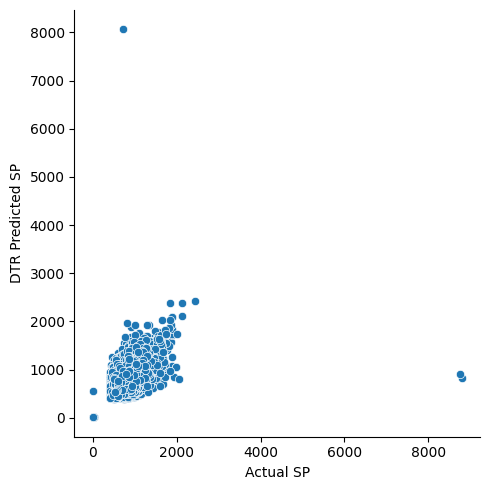

In [252]:
sns.relplot(x='Actual SP', data=sp_compare, y='DTR Predicted SP')

In [148]:
copper2.head()

,quantity tons,country,status,item type,application,thickness,width
0,1.647024,28.0,Won,W,10.0,0.693147,1500.0
1,2.294413,25.0,Won,W,41.0,-0.223144,1210.0
2,2.105434,30.0,Won,WI,28.0,-0.967584,952.0
3,1.942133,32.0,Won,S,59.0,0.832909,1317.0
4,2.300887,28.0,Won,W,10.0,1.386294,2000.0


## Step 6 -  DTR after tuning hyperparameters

In [253]:
# Grid search CV
# Defining hyperparameters for tuning

parameters={'max_depth': [5,10,15,20],
       'min_samples_split': [5,10,15],
       'min_samples_leaf': [1, 2, 3],
       'max_features': ['auto', 'sqrt', 'log2']}
grid_search=GridSearchCV(estimator=dtr,param_grid=parameters,cv=5)

grid_search.fit(X_reg_train,y_reg_train)

print("Best hyperparameters:", grid_search.best_params_)



Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}


In [262]:
best_model = grid_search.best_estimator_
y_reg_pred = best_model.predict(X_reg_test)
# evalution metrics
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 26242.91979086294
R-squared: 0.5269355556705917


In [263]:
GR_sp_compare=pd.DataFrame({'Actual SP':y_reg_test,'GS_DTR Predicted SP':y_reg_pred.round(2)})
GR_sp_compare

,Actual SP,GS_DTR Predicted SP
0,585.0,908.56
1,985.0,1300.83
2,992.0,993.80
3,754.0,921.38
4,606.0,613.00
...,...,...
36319,935.0,640.67
36320,783.0,931.00
36321,565.0,647.10
36322,554.0,859.11


In [264]:
np.power(5,1/4)

1.4953487812212205

In [275]:
new_data_status_ohe

array([[0., 0., 0., 0., 0., 0., 0.]])

In [276]:
new_data_item_ohe

array([[0., 0., 1., 0., 0., 0., 0.]])

In [271]:
new_data

array([['1.4953487812212205', '10', '3.912023005428146', '1500', '28',
        '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
        '1.0', '0.0', '0.0', '0.0', '0.0']], dtype='<U32')

In [270]:
final_new_data[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [277]:
ohe_reg2

OneHotEncoder(handle_unknown='ignore')

## Predicting SP for new data

In [280]:
# ['quantity tons', 'application', 'thickness', 'width','country'],status_ohe,item_type_ohe)

new_data=np.array([[np.power(5,1/4),10,np.log(50),1500,28,'Won','PL']])
#new_scaler=StandardScaler()
# Encoding new data
new_data_status_ohe=ohe_reg.transform(new_data[:,[5]]).toarray()
new_data_item_ohe=ohe_reg2.transform(new_data[:,[6]]).toarray()
new_data=np.concatenate((new_data[:,[0,1,2,3,4,]],new_data_status_ohe,new_data_item_ohe),axis=1)

final_new_data=scaler.transform(new_data)
new_predict=best_model.predict(final_new_data)
print('Predicted Selling Price:',new_predict)

ValueError: X has 19 features, but StandardScaler is expecting 21 features as input.

In [282]:
cop1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,CrSArea
0,2021-04-01,7.358668,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,1670798778,2021-07-01,854.00,8.006368
1,2021-04-01,27.713174,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,1668701718,2021-04-01,1047.00,6.875232
2,2021-04-01,19.650191,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,628377,2021-01-01,644.33,5.890981
3,2021-04-01,14.227087,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,1668701718,2021-01-01,768.00,8.016021
4,2021-04-01,28.027308,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,640665,2021-03-01,577.00,8.987197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,2020-07-02,10.333441,30200854.0,25.0,Won,W,41.0,-0.040822,1240.0,164141591,2020-07-01,602.00,7.082045
181668,2020-07-02,10.123241,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,164141591,2020-07-01,591.00,7.065784
181669,2020-07-02,14.425325,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,164141591,2020-07-01,589.00,7.261927
181670,2020-07-02,2.059126,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,164141591,2020-07-01,619.00,6.788409


In [283]:
cop1.to_csv('copper_new.csv',index=False)

# **Model 2 - Status Prediction - Decision Tree Classifier**

In [195]:
# Filter data only for status = won or lost
cop1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'CrSArea'],
      dtype='object')

In [196]:
cop2=cop1[['quantity tons', 'country', 'status','item type', 'application', 'thickness', 'width','selling_price']]

In [197]:
cop2

,quantity tons,country,status,item type,application,thickness,width,selling_price
0,7.358668,28.0,Won,W,10.0,0.693147,1500.0,854.00
1,27.713174,25.0,Won,W,41.0,-0.223144,1210.0,1047.00
2,19.650191,30.0,Won,WI,28.0,-0.967584,952.0,644.33
3,14.227087,32.0,Won,S,59.0,0.832909,1317.0,768.00
4,28.027308,28.0,Won,W,10.0,1.386294,2000.0,577.00
...,...,...,...,...,...,...,...,...
181667,10.333441,25.0,Won,W,41.0,-0.040822,1240.0,602.00
181668,10.123241,25.0,Won,W,41.0,-0.040822,1220.0,591.00
181669,14.425325,25.0,Won,W,41.0,-0.051293,1500.0,589.00
181670,2.059126,25.0,Won,W,41.0,-0.342490,1250.0,619.00


In [198]:
cop2['status'].nunique()

9

In [199]:
cop3=cop2[cop2['status'].isin(['Won','Lost'])]

In [200]:
cop3.reset_index(drop=True)

,quantity tons,country,status,item type,application,thickness,width,selling_price
0,7.358668,28.0,Won,W,10.0,0.693147,1500.0,854.00
1,27.713174,25.0,Won,W,41.0,-0.223144,1210.0,1047.00
2,19.650191,30.0,Won,WI,28.0,-0.967584,952.0,644.33
3,14.227087,32.0,Won,S,59.0,0.832909,1317.0,768.00
4,28.027308,28.0,Won,W,10.0,1.386294,2000.0,577.00
...,...,...,...,...,...,...,...,...
150423,10.333441,25.0,Won,W,41.0,-0.040822,1240.0,602.00
150424,10.123241,25.0,Won,W,41.0,-0.040822,1220.0,591.00
150425,14.425325,25.0,Won,W,41.0,-0.051293,1500.0,589.00
150426,2.059126,25.0,Won,W,41.0,-0.342490,1250.0,619.00


In [201]:
cop3[cop3['status']=='Lost']


,quantity tons,country,status,item type,application,thickness,width,selling_price
171,2.952965,78.0,Lost,W,10.0,0.000000,1500.0,1253.0
174,6.288879,77.0,Lost,S,10.0,0.000000,1500.0,1225.0
175,3.383785,78.0,Lost,W,10.0,1.386294,1500.0,1186.0
176,6.136774,77.0,Lost,S,10.0,-0.223144,1250.0,1249.0
179,3.207803,78.0,Lost,W,10.0,-0.223144,1500.0,1284.0
...,...,...,...,...,...,...,...,...
181527,7.991245,30.0,Lost,S,10.0,1.766442,1525.0,457.0
181529,7.485319,30.0,Lost,S,10.0,2.060514,1500.0,458.0
181531,14.360362,30.0,Lost,S,10.0,1.348073,1830.0,460.0
181533,10.148399,25.0,Lost,S,10.0,0.336472,1150.0,725.0


In [202]:
cop3.status.nunique()

2

In [203]:
cop3['status'].value_counts()

Won     115997
Lost     34431
Name: status, dtype: int64

In [204]:
cop3[['quantity tons','thickness','width','selling_price']].skew()

quantity tons      5.372880
thickness          0.326612
width              0.352751
selling_price    141.494929
dtype: float64

In [205]:
# importing necessary libraries for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer

In [206]:
# Defining X and Y for modeling
X_Class=cop3[['quantity tons','country','item type','application','thickness','width','selling_price']]
y_class=cop3['status']

In [207]:
X_Class

,quantity tons,country,item type,application,thickness,width,selling_price
0,7.358668,28.0,W,10.0,0.693147,1500.0,854.00
1,27.713174,25.0,W,41.0,-0.223144,1210.0,1047.00
2,19.650191,30.0,WI,28.0,-0.967584,952.0,644.33
3,14.227087,32.0,S,59.0,0.832909,1317.0,768.00
4,28.027308,28.0,W,10.0,1.386294,2000.0,577.00
...,...,...,...,...,...,...,...
181667,10.333441,25.0,W,41.0,-0.040822,1240.0,602.00
181668,10.123241,25.0,W,41.0,-0.040822,1220.0,591.00
181669,14.425325,25.0,W,41.0,-0.051293,1500.0,589.00
181670,2.059126,25.0,W,41.0,-0.342490,1250.0,619.00


In [208]:
y_class

0         Won
1         Won
2         Won
3         Won
4         Won
         ... 
181667    Won
181668    Won
181669    Won
181670    Won
181672    Won
Name: status, Length: 150428, dtype: object

In [209]:
X_Class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150428 entries, 0 to 181672
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150428 non-null  float64
 1   country        150428 non-null  float64
 2   item type      150428 non-null  object 
 3   application    150428 non-null  float64
 4   thickness      150428 non-null  float64
 5   width          150428 non-null  float64
 6   selling_price  150428 non-null  float64
dtypes: float64(6), object(1)
memory usage: 9.2+ MB


In [210]:
# Encoding categorical columns
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_Class[['item type']])
X_ohe=ohe.fit_transform(X_Class[['item type']]).toarray()

In [211]:
# Encoding target variable to binary values
lb=LabelBinarizer()
lb.fit(y_class)
Y=lb.fit_transform(y_class)

In [212]:
# Combining all features to array
X_class=np.concatenate((X_Class[['quantity tons','country','application','thickness','width','selling_price']].values,X_ohe),axis=1)

In [213]:
# Standardising the data
scaler2=StandardScaler()
X_class=scaler2.fit_transform(X_class)

In [214]:
X_class[1]

array([ 3.09223856e+00, -8.32697645e-01,  8.95983947e-01, -7.81583512e-01,
       -3.30015095e-01,  7.60663627e-01, -1.33985105e-02, -5.55642606e-02,
       -1.86034755e-01, -7.31722818e-01, -2.57832169e-03,  7.97536857e-01,
       -5.79801972e-02])

In [215]:
X_train,X_test,y_train,y_test=train_test_split(X_class,y_class,test_size=0.2,random_state=100)

In [216]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120342, 13), (30086, 13), (120342,), (30086,))

In [217]:
# Decision Tree Classifer
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [218]:
# Prediction
y_predict=dtc.predict(X_test)

In [219]:
status_compare=pd.DataFrame({'Actual status':y_test,'DTC Predicted Status':y_predict})
status_compare

,Actual status,DTC Predicted Status
123125,Won,Won
88320,Lost,Lost
103925,Won,Lost
39180,Won,Lost
83190,Won,Won
...,...,...
75149,Won,Won
89695,Lost,Won
121281,Lost,Won
10816,Won,Won


## Evaluation Metrics

In [220]:
# Accuracy
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.8570763810410158

In [221]:
# Confusion Matrix
CM=confusion_matrix(y_test,y_predict)
print('Confusion Matrix:\n',CM)

Confusion Matrix:
 [[ 4801  2159]
 [ 2141 20985]]


<Axes: >

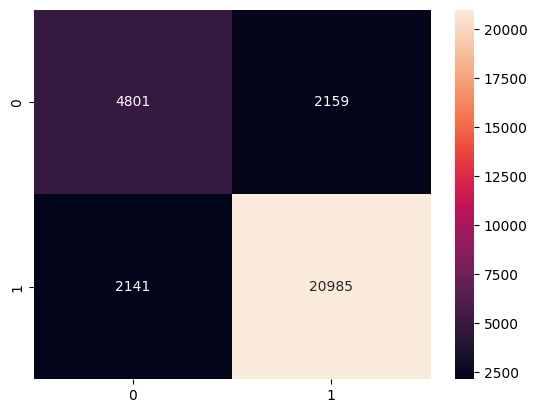

In [222]:
sns.heatmap(CM,annot=True,fmt='g')

In [223]:
# Classification Report
from sklearn.metrics import classification_report, roc_curve, auc
cr=classification_report(y_test, y_predict,output_dict=True)
crp=pd.DataFrame(cr).transpose()
crp

,precision,recall,f1-score,support
Lost,0.691587,0.689799,0.690692,6960.000000
Won,0.906714,0.907420,0.907067,23126.000000
accuracy,0.857076,0.857076,0.857076,0.857076
macro avg,0.799151,0.798610,0.798880,30086.000000
weighted avg,0.856948,0.857076,0.857012,30086.000000


In [226]:
# Predicting Status for given inputs
#['quantity tons','country','application','thickness','width','selling_price','item type']
new_sample = np.array([[1.1449, 78, 10,0, 1500, 1253,'W']])

new_sample_ohe = ohe.transform(new_sample[:, [6]]).toarray()
new_sample = np.concatenate((new_sample[:,[0,1,2,3,4,5]], new_sample_ohe), axis=1)
new_sample = scaler2.transform(new_sample)
new_pred = dtc.predict(new_sample)
print(new_sample)
print(new_pred)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')


[[-0.88590394  1.33161107 -0.86137098 -0.54199801  0.75952024  1.46910475
  -0.01339851 -0.05556426 -0.18603476 -0.73172282 -0.00257832  0.79753686
  -0.0579802 ]]
['Won']
The status is: Lost


In [ ]:
cop3[cop3['status']=='Lost'][:5]


In [230]:
# Saving the Model in pickle
import pickle
with open('classmodel.pkl','wb') as file:
    pickle.dump(dtc,file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [231]:
# Loading the model
class_load=pickle.load(open('classmodel.pkl','rb'))

In [235]:
# Predicting Status for given inputs by loading pickle
#['quantity tons','country','application','thickness','width','selling_price','item type']
new_sample = np.array([[5, 28, 10,1.386294, 1200, 1286,'W']])

new_sample_ohe = ohe.transform(new_sample[:, [6]]).toarray()
new_sample = np.concatenate((new_sample[:,[0,1,2,3,4,5]], new_sample_ohe), axis=1)
new_sample = scaler2.transform(new_sample)
new_pred = class_load.predict(new_sample)
print(new_pred)


['Lost']
